# Evaluating the difficulty of a route

To provide the user with an objective measure of the route's difficulty beyond mere distance and climb metrics we need to create a difficulty score (or index). It will ideally take into account the following parameters:

1. Distance.
2. Elevation gain.
3. Stats relative to other routes.

In [10]:
import pandas as pd
import seaborn as sns

In [19]:
#Importing our routes dataframe.

routes = pd.read_csv('routes_2207_619.csv')

In [31]:
#Checking for the longest routes.

longest = routes.sort_values('distance', ascending=False)
longest.head()

,ID,name,ccaa,province,start,midpoint,trailrank,distance,gradient,min_alt,max_alt,municipality,mountain_passes_ids,municipalities_ids
607,9531,La Almenara por Hornachuelos.,NaN,NaN,"[-5.106862,37.803821]","[-5.989482,37.41337]",19,226,2060,2,92,NaN,[1102],[2091]
259,2769,Ermida por Ourense y Puebla de Sanabria.,NaN,NaN,"[-6.403786,42.031926]","[-7.184281,42.3368]",32,224,4256,225,1313,NaN,[383],"[4956, 7763]"
195,7800,Carmona y Collado De Hoz por Cabezón de la Sal...,NaN,NaN,"[-4.23573,43.308033]","[-4.43152,43.106027]",48,222,3796,5,1248,NaN,"[288, 681, 838, 1101]","[5789, 5857, 5832]"
389,2450,Piedrasluengas y Carmona por Cabezón de la Sal...,NaN,NaN,"[-4.285052,43.376923]","[-4.573241,43.111127]",36,214,3523,0,1354,NaN,"[87, 288, 657, 838, 1101]","[5789, 5857, 5832, 5042]"
11,5257,Haza Del Lino por Motril y Dúrcal.,NaN,NaN,"[-3.596787,37.182303]","[-3.262158,36.758787]",66,214,3043,7,1275,NaN,[13],"[2800, 2747, 2806, 2818]"


In [30]:
#Checking for the ones with more elevation gain.

highest = routes.sort_values('gradient', ascending=False)
highest.head()

,ID,name,ccaa,province,start,midpoint,trailrank,distance,gradient,min_alt,max_alt,municipality,mountain_passes_ids,municipalities_ids
448,9347,Portela De Aldarís por Boiro y Padrón.,NaN,NaN,"[-8.652448,42.723446]","[-8.878824,42.697304]",23,87,5629,3,529,NaN,[764],"[2143, 2196]"
228,882,Ancares y Lumeras por Villafranca del Bierzo y...,NaN,NaN,"[-6.814618,42.603045]","[-6.856464,42.900584]",40,172,5307,481,1659,NaN,"[3, 335, 1109]","[3805, 4245]"
50,8392,Collada Llomena y Amieva por Cangas de Onís y ...,NaN,NaN,"[-5.14233,43.27333]","[-5.17584,43.19447]",53,97,5165,138,1063,NaN,"[68, 422]","[5006, 5009]"
416,8917,Muniketa y Natxitua por Durango y Zarautz.,NaN,NaN,"[-2.642798,43.177892]","[-2.418933,43.320043]",32,195,4774,0,413,NaN,"[353, 357, 699, 782, 1042, 1059]","[7525, 3227, 7544, 7515, 3165, 7571]"
340,9410,Calar Alto y Venta Luisa - Calar Alto por Tíjola.,NaN,NaN,"[-2.304858,37.36469]","[-2.693236,37.238361]",21,143,4619,469,2159,NaN,"[10, 29, 64, 77, 554]",[368]


## Establishing the scoring criteria

In the previous section we noticed that a few routes have an extreme elevation gain (>5000m), thus making them unassailable from the fitness level of the average cyclist. In this section we will take a quick look at those routes and remove them if necessary. We will be using **Seaborn** for this purpose.

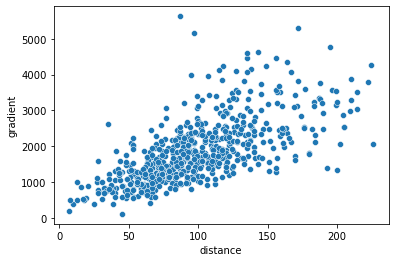

In [40]:
#Visualizing the distance/gradient distribution of all routes.

ax = sns.scatterplot(x="distance", y="gradient", data=routes)

It's easy to appreciate the roughly linear correlation between distance and elevation gain, which was quite expected. We can also see that the 3 routes with the most elevation gain are clearly outliers, including an extreme case. At this point we can't be really certain if those values are due to incredibly hard routes or faulty gps data, but our safest bet is removing them altogether.